<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/AdvertisementEffectUsing_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
URL='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv'
df=pd.read_csv(URL)
df.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

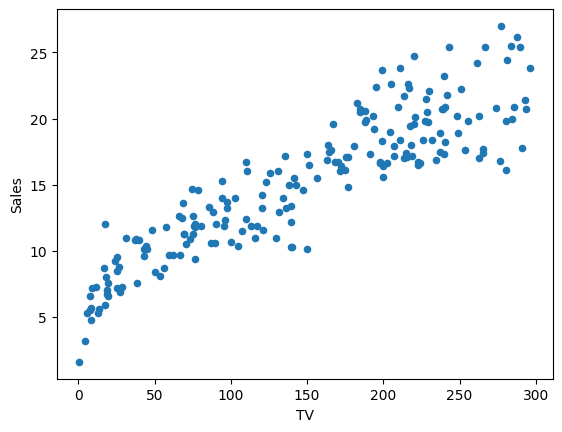

In [10]:
df.plot(
    kind='scatter',
    x='TV',
    y='Sales',
)
plt.show()

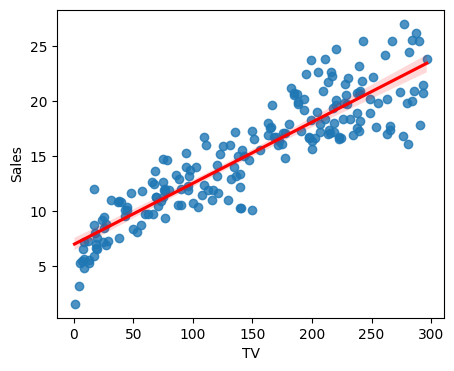

In [12]:
from seaborn import regplot
plt.figure(figsize=(5,4))
regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df, test_size=0.1, random_state=2)
train_set.head()

,TV,Radio,Newspaper,Sales
23,228.3,16.9,26.2,20.5
25,262.9,3.5,19.5,17.0
6,57.5,32.8,23.5,11.8
134,36.9,38.6,65.6,10.8
165,234.5,3.4,84.8,16.9


In [18]:
x_train=np.asanyarray(train_set[['TV']])
y_train=np.asanyarray(train_set[['Sales']])

In [19]:
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [20]:
theta0=LR_model.intercept_[0]
theta1=LR_model.coef_[0][0]

<Figure size 500x400 with 0 Axes>

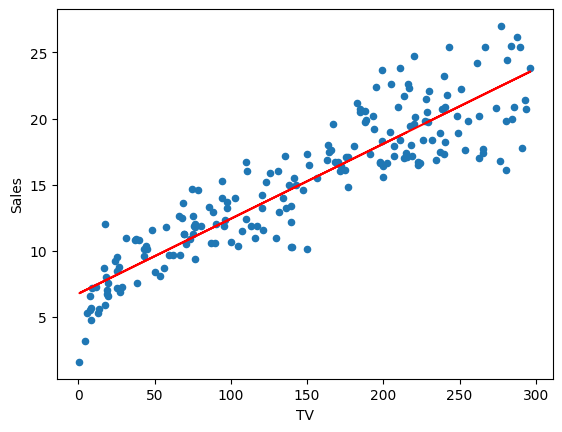

In [21]:
plt.figure(figsize=(5,4))
df.plot(kind='scatter', x='TV', y='Sales')
plt.plot(x_train, theta0+theta1*x_train, '-r')
plt.show()

In [47]:
x_test=np.asanyarray(test_set[['TV']])
y_test=np.asanyarray(test_set['Sales'])

y_predicted=LR_model.predict(x_test)
y_check=[i[0] for i in y_predicted]
pd.DataFrame({'Real':y_test,'Predicted':y_check})

,Real,Predicted
0,17.1,16.713718
1,10.5,10.758545
2,8.7,9.942612
3,18.4,19.909454
4,19.6,16.209427
5,20.2,17.705303
6,12.6,10.503566
7,20.2,21.643310
8,12.6,11.013523
9,17.8,23.229846
